In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
codec = 'x264'
metrics_hardware = pd.read_csv(f'../metrics/quality_energy_hardware_{codec}.csv')
# metrics_hardware.head(8)
metrics_hardware[0:8]

,video_name,vid,category,resolution,width,height,pixfmt,framerate,bitrate_rawvideo (kb/s),bitrate_encoded (kb/s),...,duplicate_bitrate_rawvideo (kb/s),start_time_encode,end_time_encode,count_encode,start_time_decode,end_time_decode,count_decode,target_encode_energy,decode_energy,total_energy
0,Gaming_2160P-3002,Gaming_2160P-3002,Gaming,2160,3840,2160,yuv420p,24.0,2388797,83952,...,2488320,2023-11-20 18:59:49.463,2023-11-20 19:00:56.015,1,2023-11-20 19:01:10.028,2023-11-20 19:01:13.024,1,6734.441419,313.181867,7047.623285
1,Gaming_2160P-3002,Gaming_2160P-3002,Gaming,2160,3840,2160,yuv420p,24.0,2388797,30658,...,2488320,2023-11-20 19:04:42.539,2023-11-20 19:05:32.445,1,2023-11-20 19:05:46.338,2023-11-20 19:05:48.021,1,5200.941314,180.733162,5381.674476
2,Gaming_2160P-3002,Gaming_2160P-3002,Gaming,2160,3840,2160,yuv420p,24.0,2388797,10379,...,2488320,2023-11-20 19:07:07.095,2023-11-20 19:07:48.053,1,2023-11-20 19:08:02.911,2023-11-20 19:08:05.079,2,3839.771542,206.809133,4046.580675
3,Gaming_2160P-3002,Gaming_2160P-3002,Gaming,2160,3840,2160,yuv420p,24.0,2388797,3837,...,2488320,2023-11-20 19:10:02.854,2023-11-20 19:10:47.099,1,2023-11-20 19:11:01.387,2023-11-20 19:11:20.832,2,3348.727791,146.307723,3495.035515
4,Gaming_2160P-3002,Gaming_2160P-3002,Gaming,2160,3840,2160,yuv420p,24.0,2388797,1493,...,2488320,2023-11-20 19:12:50.347,2023-11-20 19:13:37.382,1,2023-11-20 19:13:52.592,2023-11-20 19:14:10.334,2,3056.808478,NaN,NaN
5,Gaming_2160P-3002,Gaming_2160P-3002_downsample_1080p,Gaming,1080,1920,1080,yuv420p,24.0,2388797,36004,...,622080,2023-11-21 06:10:28.110,2023-11-21 06:12:27.434,1,2023-11-21 06:12:44.989,2023-11-21 06:12:53.925,1,1993.418490,142.002814,2135.421304
6,Gaming_2160P-3002,Gaming_2160P-3002_downsample_1080p,Gaming,1080,1920,1080,yuv420p,24.0,2388797,10817,...,622080,2023-11-21 06:17:58.164,2023-11-21 06:19:29.304,1,2023-11-21 06:19:43.108,2023-11-21 06:19:48.817,1,1458.617958,87.663003,1546.280961
7,Gaming_2160P-3002,Gaming_2160P-3002_downsample_1080p,Gaming,1080,1920,1080,yuv420p,24.0,2388797,3314,...,622080,2023-11-21 06:22:44.110,2023-11-21 06:23:50.577,1,2023-11-21 06:24:05.520,2023-11-21 06:24:07.232,1,997.459889,28.013313,1025.473203


In [103]:
vid_uniques = metrics_hardware['vid'].unique()
vid_uniques[0:8]

array(['Gaming_2160P-3002', 'Gaming_2160P-3002_downsample_1080p',
       'Gaming_2160P-3002_downsample_720p', 'Sports_2160P-1b70',
       'Sports_2160P-1b70_downsample_1080p',
       'Sports_2160P-1b70_downsample_720p', 'Gaming_2160P-34a1',
       'Gaming_2160P-34a1_downsample_1080p'], dtype=object)

In [104]:
metrics_software = pd.read_excel(f'../metrics/quality_energy_software_{codec}.xlsx')
metrics_software['VMAF'] = metrics_software.apply(lambda row: metrics_hardware[(metrics_hardware['video_name'] == row['video_name']) & (metrics_hardware['resolution'] == row['resolution']) & (metrics_hardware['QP'] == row['QP'])]['VMAF'].values[0], axis=1)
metrics_software[0:8]

,video_name,resolution,bitrate_encoded (kb/s),PSNR,QP,target_encode_energy,decode_energy,VMAF
0,Gaming_2160P-2dc4,2160,160740.026,51.91,10,8340.476233,958.265296,98.930035
1,Gaming_2160P-2dc4,2160,38077.228,45.10,20,5872.615528,823.851135,95.182779
2,Gaming_2160P-2dc4,2160,9529.995,39.82,30,3813.727563,700.261108,79.122324
3,Gaming_2160P-2dc4,2160,2820.581,35.08,40,2583.754322,611.262964,45.824188
4,Gaming_2160P-2dc4,2160,754.790,30.41,50,2041.695984,595.852283,14.100111
5,Gaming_2160P-2dc4,1080,47443.276,41.56,10,2453.483765,194.174988,90.857655
6,Gaming_2160P-2dc4,1080,10017.420,39.90,20,1543.864929,131.290576,82.972874
7,Gaming_2160P-2dc4,1080,2542.005,36.95,30,1000.691101,104.302380,59.445348


In [105]:
# # per video sequence
# # fig_op == 'vmaf_encode'
# for i in range(len(vid_uniques)):
#     metrics_hardware_sort = metrics_hardware[metrics_hardware['vid'] == vid_uniques[i]]
#     print(vid_uniques[i])
#
#     x = metrics_hardware_sort['target_encode_energy'].tolist()
#     print('target_encode_energy:', x)
#     y = metrics_hardware_sort['VMAF'].tolist()
#     print('VMAF:', y)
#
#     plt.plot(x, y, label=vid_uniques[i])
#     plt.scatter(x, y)
#     plt.legend(loc='lower right', title='Video Sequence', fontsize=6, title_fontsize=6)
#     plt.xlabel('Encode Energy (kJ)')
#     plt.ylabel('VMAF')
#     plt.title('VMAF vs Encode Energy')
#     plt.show()

Text(0.5, 1.0, 'VMAF vs Encode Energy - Hardware')

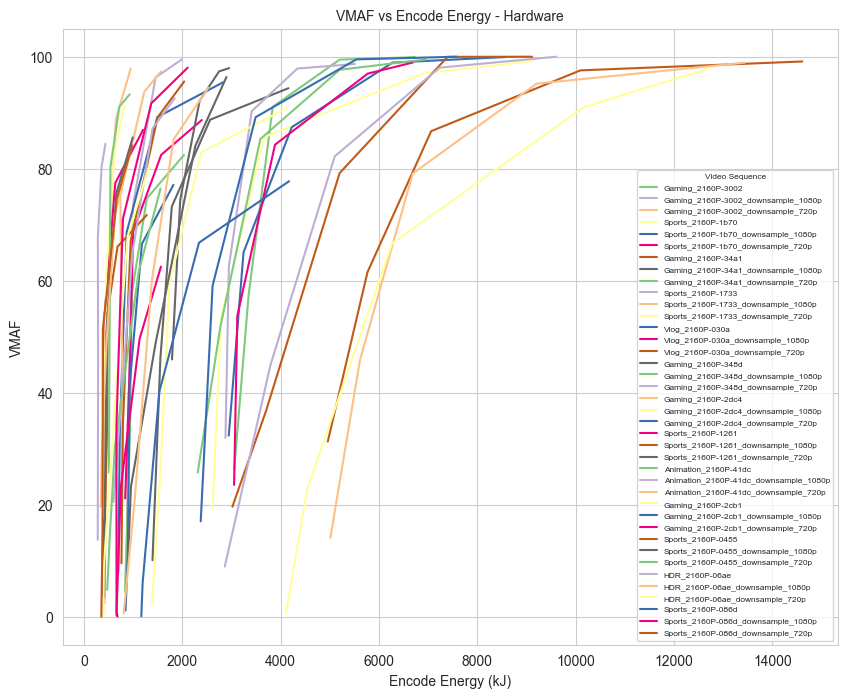

In [106]:
fig_op = 'vmaf_encode_hardware'
plt.figure(figsize=(10, 8))
fig = sns.lineplot(data=metrics_hardware, x="target_encode_energy", y="VMAF", hue='vid', palette="Accent", sort=False)
plt.legend(loc='lower right', title='Video Sequence', fontsize=6, title_fontsize=6)
plt.xlabel('Encode Energy (kJ)', fontsize=10)
plt.ylabel('VMAF', fontsize=10)
plt.title('VMAF vs Encode Energy - Hardware', fontsize=10)
# line_fig = fig.get_figure()

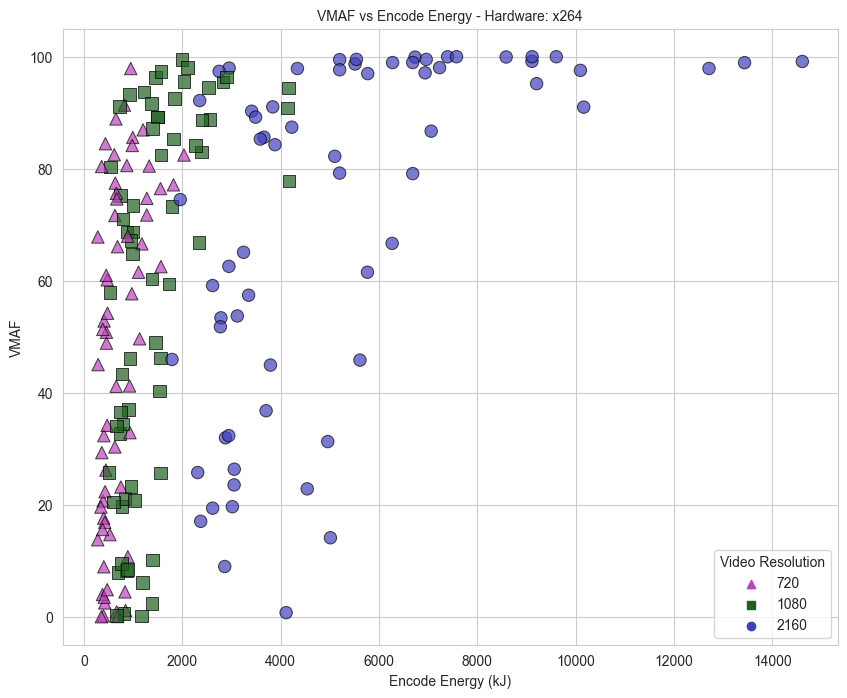

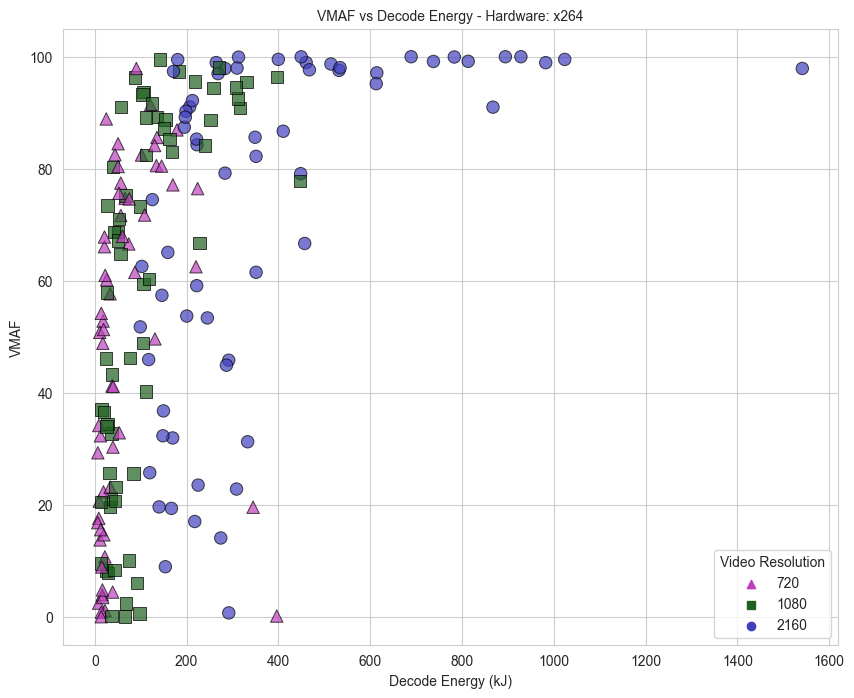

In [107]:
fig_op = 'vmaf_encode_hardware'
plt.figure(figsize=(10, 8))
fig = sns.scatterplot(data=metrics_hardware, x="target_encode_energy", y="VMAF", hue='resolution', style='resolution',
        palette={
        2160: sns.desaturate("blue", 0.5),
        1080: sns.desaturate("green", 0.5),
        720: sns.desaturate("magenta", 0.5),}, s=80, alpha=0.7, edgecolor='black', markers={2160: "o", 1080: "s", 720: "^"})
plt.legend(loc='lower right', title='Video Resolution', fontsize=10, title_fontsize=10)
plt.xlabel('Encode Energy (kJ)', fontsize=10)
plt.ylabel('VMAF', fontsize=10)
plt.title(f'VMAF vs Encode Energy - Hardware: {codec}', fontsize=10)
fig_path = f'../fig/{codec}/VMAF_encode_hardware.png'
plt.savefig(fig_path, dpi=300)
plt.show()
plt.close()

fig_op = 'vmaf_decode_hardware'
plt.figure(figsize=(10, 8))
fig = sns.scatterplot(data=metrics_hardware, x="decode_energy", y="VMAF", hue='resolution', style='resolution',
        palette={
        2160: sns.desaturate("blue", 0.5),
        1080: sns.desaturate("green", 0.5),
        720: sns.desaturate("magenta", 0.5),}, s=80, alpha=0.7, edgecolor='black', markers={2160: "o", 1080: "s", 720: "^"})
plt.legend(loc='lower right', title='Video Resolution', fontsize=10, title_fontsize=10)
plt.xlabel('Decode Energy (kJ)', fontsize=10)
plt.ylabel('VMAF', fontsize=10)
plt.title(f'VMAF vs Decode Energy - Hardware: {codec}', fontsize=10)
fig_path = f'../fig/{codec}/VMAF_decode_hardware.png'
plt.savefig(fig_path, dpi=300)
plt.show()
plt.close()

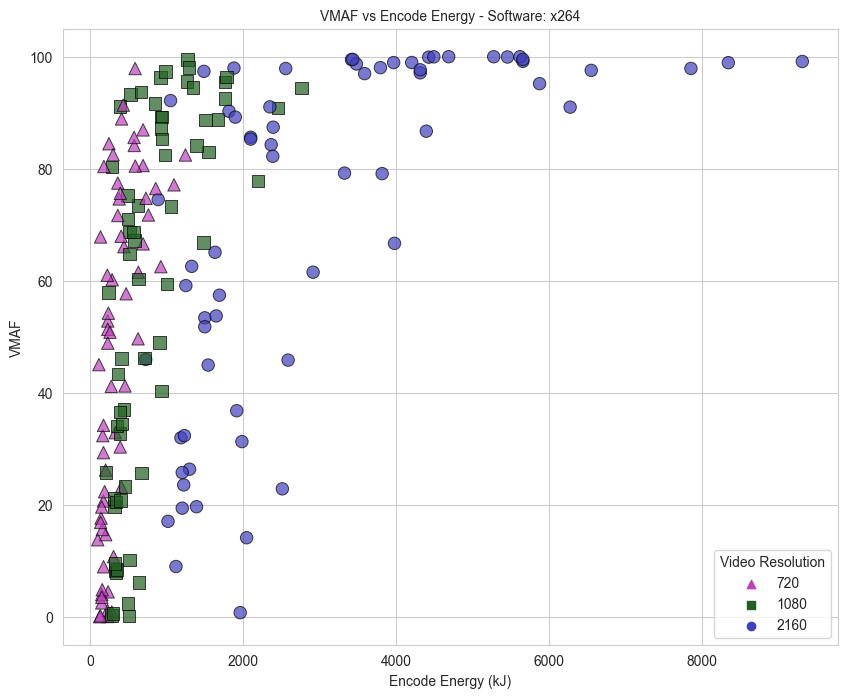

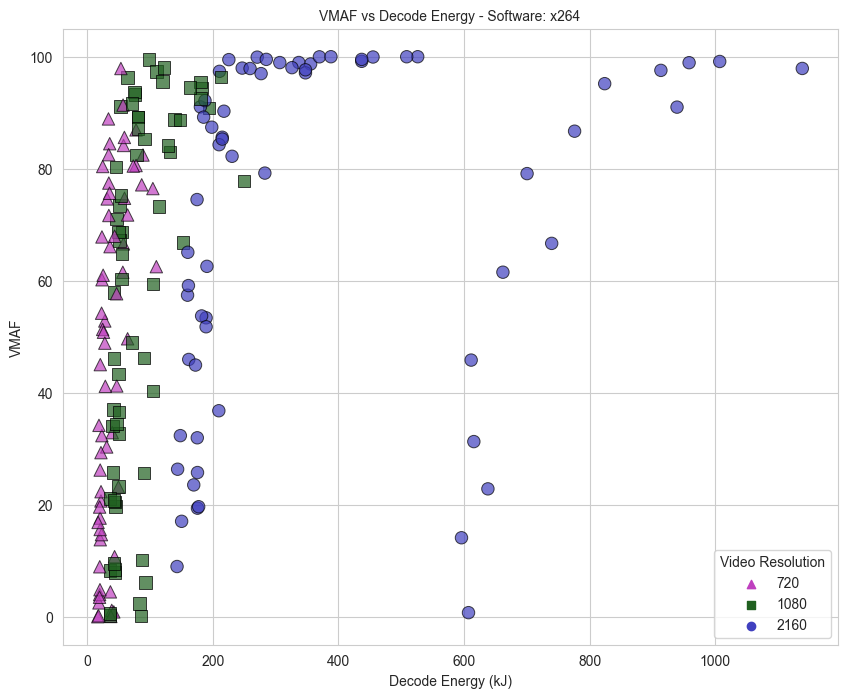

In [108]:
fig_op = 'vmaf_encode_software'
plt.figure(figsize=(10, 8))
fig = sns.scatterplot(data=metrics_software, x="target_encode_energy", y="VMAF", hue='resolution', style='resolution',
        palette={
        2160: sns.desaturate("blue", 0.5),
        1080: sns.desaturate("green", 0.5),
        720: sns.desaturate("magenta", 0.5),}, s=80, alpha=0.7, edgecolor='black', markers={2160: "o", 1080: "s", 720: "^"})
plt.legend(loc='lower right', title='Video Resolution', fontsize=10, title_fontsize=10)
plt.xlabel('Encode Energy (kJ)', fontsize=10)
plt.ylabel('VMAF', fontsize=10)
plt.title(f'VMAF vs Encode Energy - Software: {codec}', fontsize=10)
fig_path = f'../fig/{codec}/VMAF_encode_software.png'
plt.savefig(fig_path, dpi=300)
plt.show()
plt.close()

fig_op = 'vmaf_decode_software'
plt.figure(figsize=(10, 8))
fig = sns.scatterplot(data=metrics_software, x="decode_energy", y="VMAF", hue='resolution', style='resolution',
        palette={
        2160: sns.desaturate("blue", 0.5),
        1080: sns.desaturate("green", 0.5),
        720: sns.desaturate("magenta", 0.5),}, s=80, alpha=0.7, edgecolor='black', markers={2160: "o", 1080: "s", 720: "^"})
plt.legend(loc='lower right', title='Video Resolution', fontsize=10, title_fontsize=10)
plt.xlabel('Decode Energy (kJ)', fontsize=10)
plt.ylabel('VMAF', fontsize=10)
plt.title(f'VMAF vs Decode Energy - Software: {codec}', fontsize=10)
fig_path = f'../fig/{codec}/VMAF_decode_software.png'
plt.savefig(fig_path, dpi=300)
plt.show()
plt.close()

In [109]:
# # per video sequence
# # fig_op == 'psnr_encode'
# for i in range(len(vid_uniques)):
#     metrics_hardware_sort = metrics_hardware[metrics_hardware['vid'] == vid_uniques[i]]
#     print(vid_uniques[i])
#
#     x = metrics_hardware_sort['target_encode_energy'].tolist()
#     print('target_encode_energy:', x)
#     y = metrics_hardware_sort['PSNR'].tolist()
#     print('PSNR:', y)
#
#     plt.plot(x, y, label=vid_uniques[i])
#     plt.scatter(x, y)
#     plt.legend(loc='lower right', title='Video Sequence', fontsize=6, title_fontsize=6)
#     plt.xlabel('Encode Energy (kJ)')
#     plt.ylabel('PSNR (dB)')
#     plt.title('PSNR vs Encode Energy')
#     plt.show()

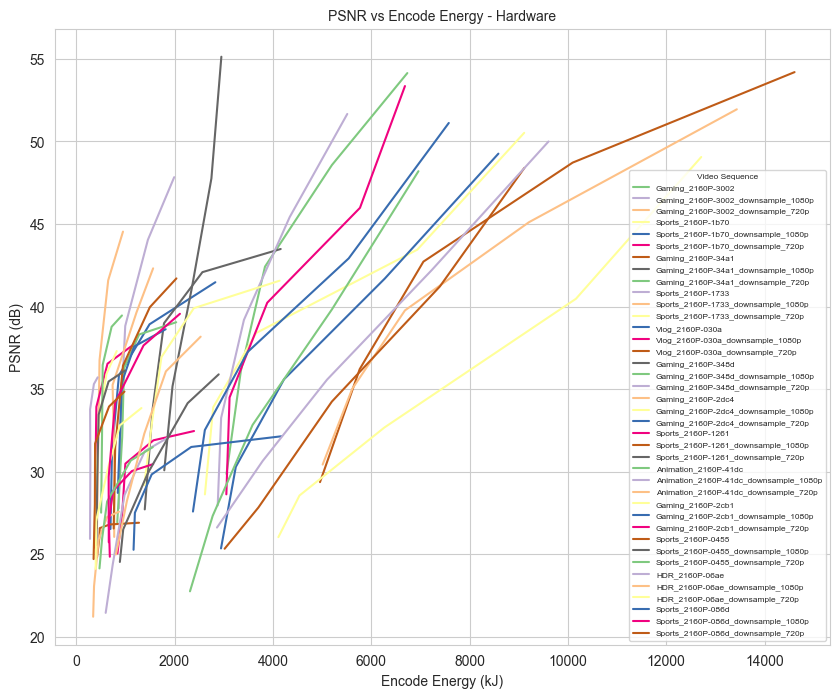

In [110]:
fig_op == 'psnr_encode_hardware'
plt.figure(figsize=(10, 8))
fig = sns.lineplot(data=metrics_hardware, x="target_encode_energy", y="PSNR", hue='vid', palette="Accent", sort=False)
plt.legend(loc='lower right', title='Video Sequence', fontsize=6, title_fontsize=6)
plt.xlabel('Encode Energy (kJ)', fontsize=10)
plt.ylabel('PSNR (dB)', fontsize=10)
plt.title('PSNR vs Encode Energy - Hardware', fontsize=10)
line_fig = fig.get_figure()

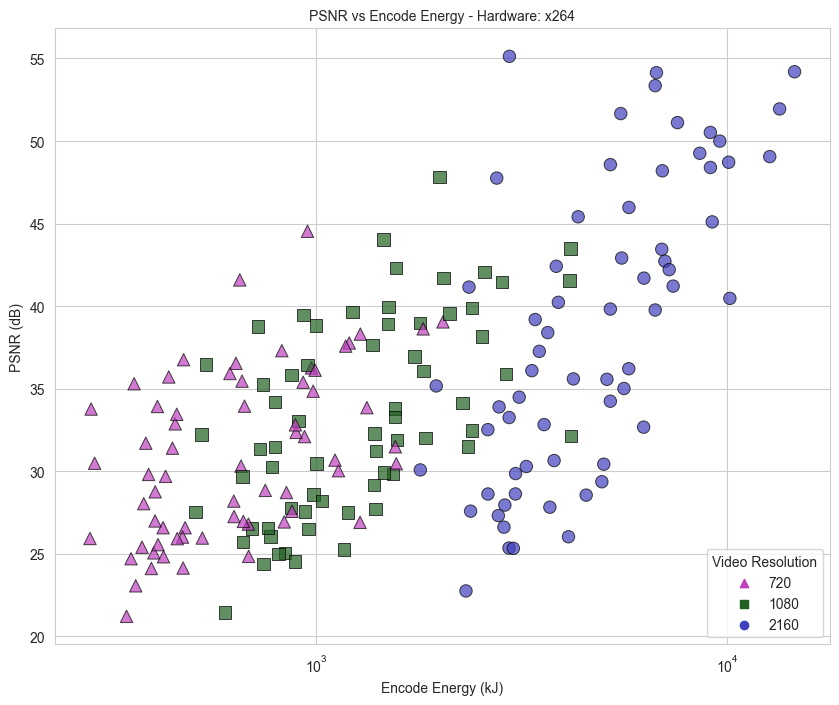

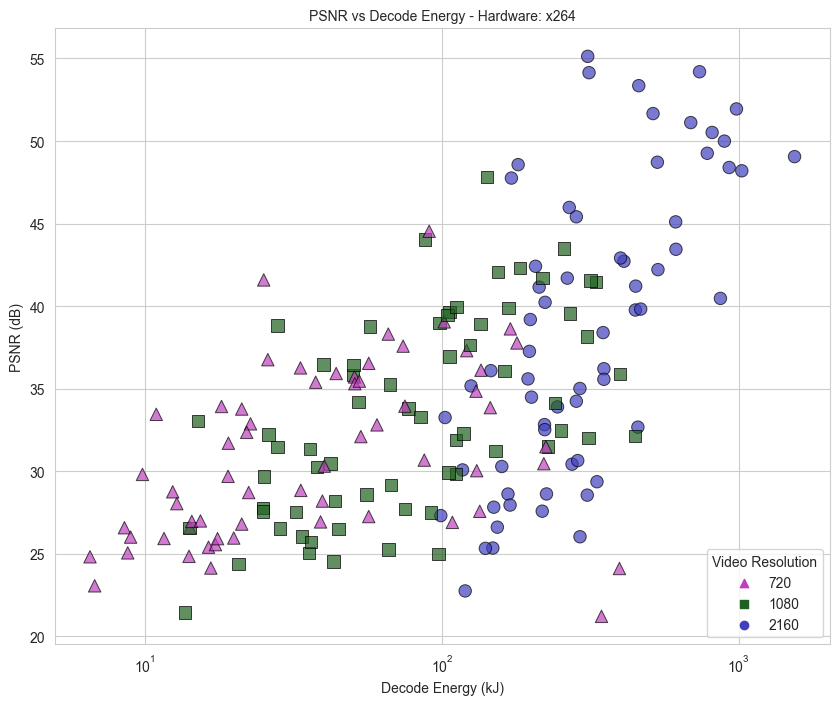

In [111]:
fig_op = 'psnr_encode_hardware'
plt.figure(figsize=(10, 8))
fig = sns.scatterplot(data=metrics_hardware, x="target_encode_energy", y="PSNR", hue='resolution', style='resolution',
        palette={
        2160: sns.desaturate("blue", 0.5),
        1080: sns.desaturate("green", 0.5),
        720: sns.desaturate("magenta", 0.5),}, s=80, alpha=0.7, edgecolor='black', markers={2160: "o", 1080: "s", 720: "^"})
fig.set_xscale('log')
plt.legend(loc='lower right', title='Video Resolution', fontsize=10, title_fontsize=10)
plt.xlabel('Encode Energy (kJ)', fontsize=10)
plt.ylabel('PSNR (dB)', fontsize=10)
plt.title(f'PSNR vs Encode Energy - Hardware: {codec}', fontsize=10)
fig_path = f'../fig/{codec}/PSNR_encode_hardware.png'
plt.savefig(fig_path, dpi=300)
plt.show()
plt.close()


fig_op = 'psnr_decode_hardware'
plt.figure(figsize=(10, 8))
fig = sns.scatterplot(data=metrics_hardware, x="decode_energy", y="PSNR", hue='resolution', style='resolution',
        palette={
        2160: sns.desaturate("blue", 0.5),
        1080: sns.desaturate("green", 0.5),
        720: sns.desaturate("magenta", 0.5),}, s=80, alpha=0.7, edgecolor='black', markers={2160: "o", 1080: "s", 720: "^"})
fig.set_xscale('log')
plt.legend(loc='lower right', title='Video Resolution', fontsize=10, title_fontsize=10)
plt.xlabel('Decode Energy (kJ)', fontsize=10)
plt.ylabel('PSNR (dB)', fontsize=10)
plt.title(f'PSNR vs Decode Energy - Hardware: {codec}', fontsize=10)
fig_path = f'../fig/{codec}/PSNR_decode_hardware.png'
plt.savefig(fig_path, dpi=300)
plt.show()
plt.close()

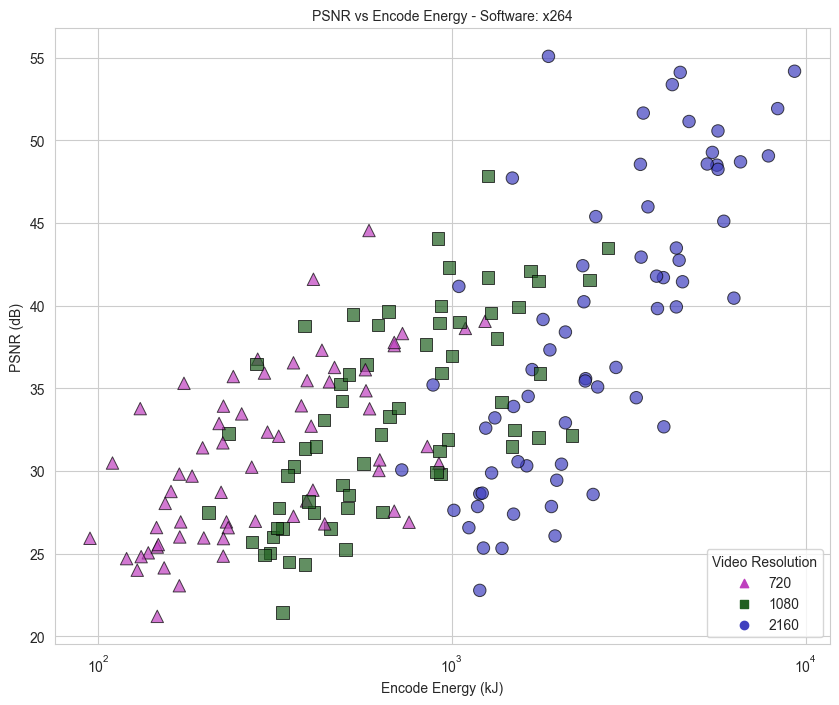

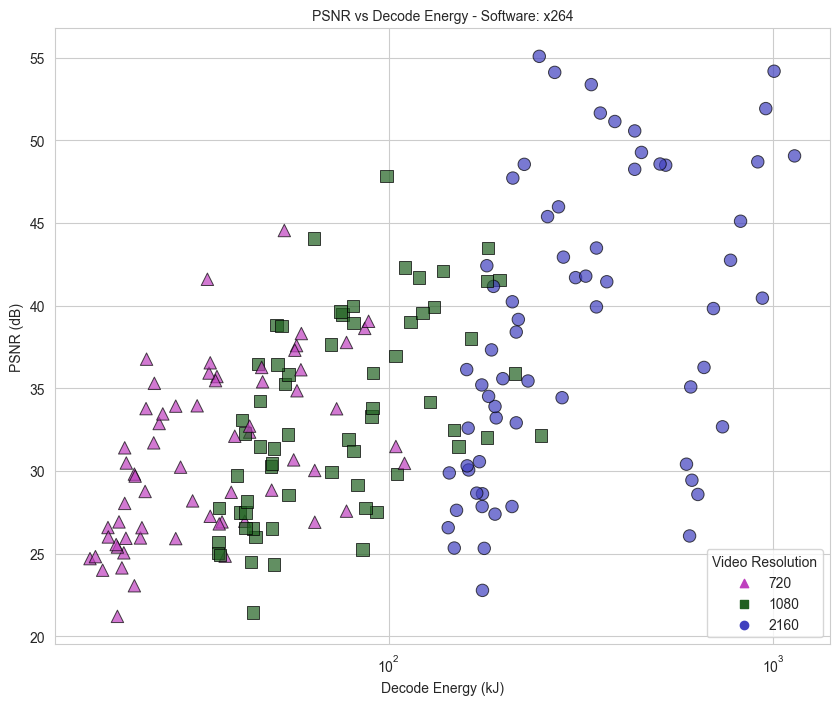

In [112]:
fig_op = 'psnr_encode_software'
plt.figure(figsize=(10, 8))
fig = sns.scatterplot(data=metrics_software, x="target_encode_energy", y="PSNR", hue='resolution', style='resolution',
        palette={
        2160: sns.desaturate("blue", 0.5),
        1080: sns.desaturate("green", 0.5),
        720: sns.desaturate("magenta", 0.5),}, s=80, alpha=0.7, edgecolor='black', markers={2160: "o", 1080: "s", 720: "^"})
fig.set_xscale('log')
plt.legend(loc='lower right', title='Video Resolution', fontsize=10, title_fontsize=10)
plt.xlabel('Encode Energy (kJ)', fontsize=10)
plt.ylabel('PSNR (dB)', fontsize=10)
plt.title(f'PSNR vs Encode Energy - Software: {codec}', fontsize=10)
fig_path = f'../fig/{codec}/PSNR_encode_software.png'
plt.savefig(fig_path, dpi=300)
plt.show()
plt.close()

fig_op = 'psnr_decode_software'
plt.figure(figsize=(10, 8))
fig = sns.scatterplot(data=metrics_software, x="decode_energy", y="PSNR", hue='resolution', style='resolution',
        palette={
        2160: sns.desaturate("blue", 0.5),
        1080: sns.desaturate("green", 0.5),
        720: sns.desaturate("magenta", 0.5),}, s=80, alpha=0.7, edgecolor='black', markers={2160: "o", 1080: "s", 720: "^"})
fig.set_xscale('log')
plt.legend(loc='lower right', title='Video Resolution', fontsize=10, title_fontsize=10)
plt.xlabel('Decode Energy (kJ)', fontsize=10)
plt.ylabel('PSNR (dB)', fontsize=10)
plt.title(f'PSNR vs Decode Energy - Software: {codec}', fontsize=10)
fig_path = f'../fig/{codec}/PSNR_decode_software.png'
plt.savefig(fig_path, dpi=300)
plt.show()
plt.close()

In [113]:
# # per video sequence
# # fig_op == 'bitrate_encode'
# for i in range(len(vid_uniques)):
#     metrics_hardware_sort = metrics_hardware[metrics_hardware['vid'] == vid_uniques[i]]
#     print(vid_uniques[i])
#
#     x = metrics_hardware_sort['bitrate_encoded (kb/s)'].tolist()
#     print('bitrate_encoded (kb/s):', x)
#     y = metrics_hardware_sort['target_encode_energy'].tolist()
#     print('target_encode_energy:', y)
#
#     plt.plot(x, y, label=vid_uniques[i])
#     plt.scatter(x, y)
#     plt.legend(loc='lower right', title='Video Sequence', fontsize=6, title_fontsize=6)
#     plt.xlabel('Bitrate (kb/s)')
#     plt.ylabel('Encode Energy (kJ)')
#     plt.title('Bitrate vs Encode Energy')
#     plt.show()

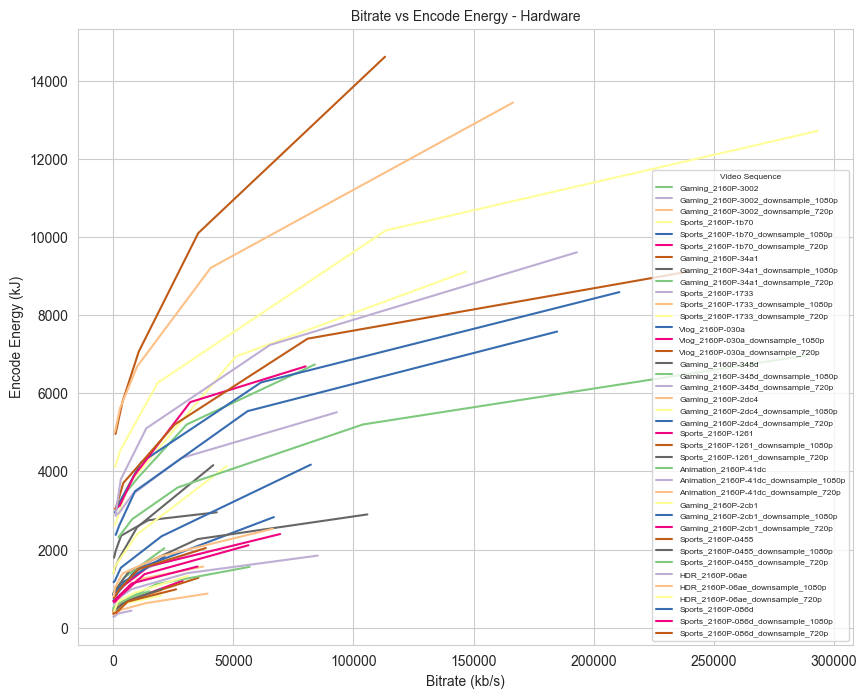

In [114]:
fig_op == 'bitrate_encode_hardware'
plt.figure(figsize=(10, 8))
fig = sns.lineplot(data=metrics_hardware, x="bitrate_encoded (kb/s)", y="target_encode_energy", hue='vid', palette="Accent", sort=False)
plt.legend(loc='lower right', title='Video Sequence', fontsize=6, title_fontsize=6)
plt.xlabel('Bitrate (kb/s)', fontsize=10)
plt.ylabel('Encode Energy (kJ)', fontsize=10)
plt.title('Bitrate vs Encode Energy - Hardware', fontsize=10)
line_fig = fig.get_figure()

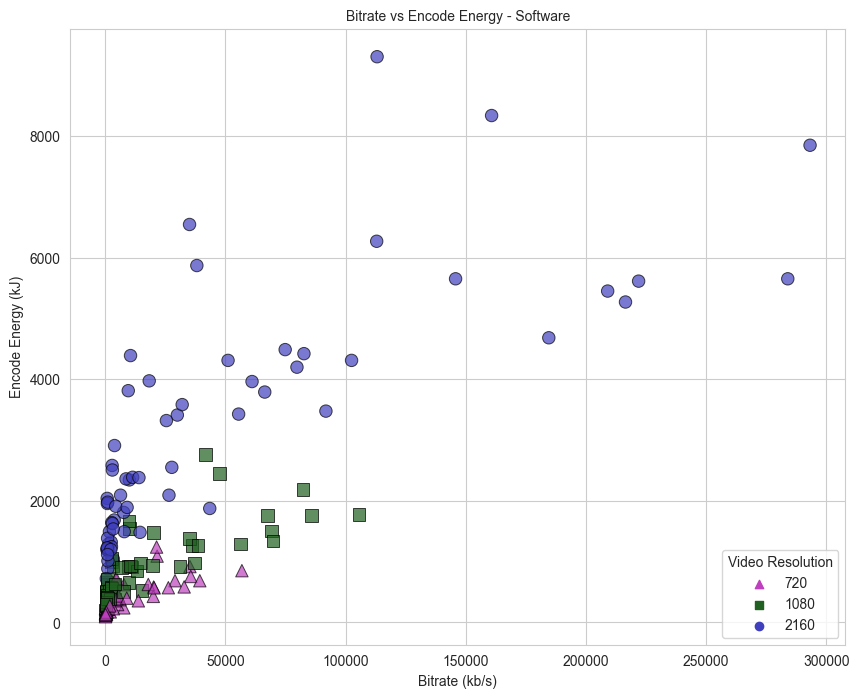

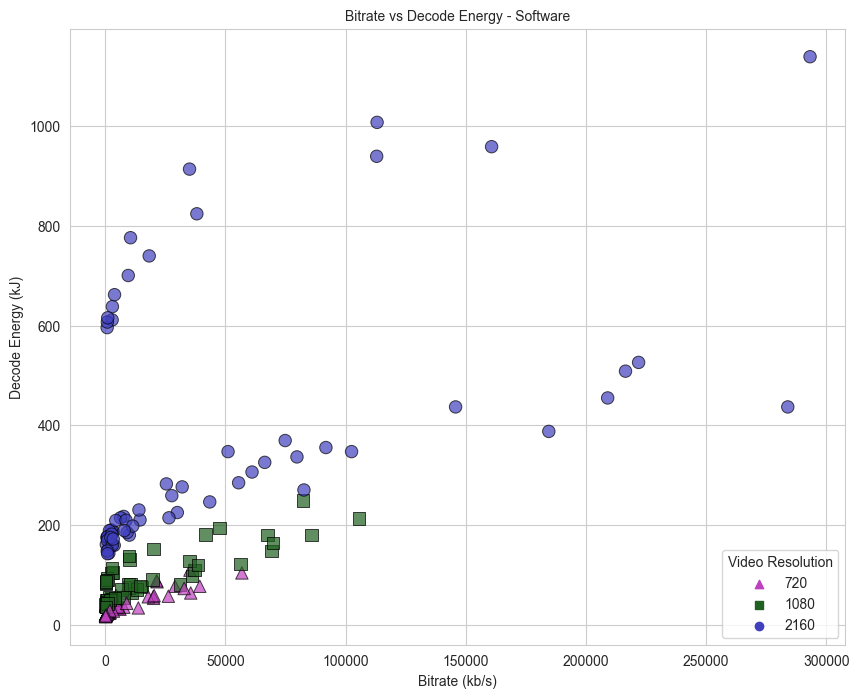

In [115]:
fig_op = 'bitrate_encode_software'
plt.figure(figsize=(10, 8))
fig = sns.scatterplot(data=metrics_software, x="bitrate_encoded (kb/s)", y="target_encode_energy", hue='resolution', style='resolution',
        palette={
        2160: sns.desaturate("blue", 0.5),
        1080: sns.desaturate("green", 0.5),
        720: sns.desaturate("magenta", 0.5),}, s=80, alpha=0.7, edgecolor='black', markers={2160: "o", 1080: "s", 720: "^"})
plt.legend(loc='lower right', title='Video Resolution', fontsize=10, title_fontsize=10)
plt.xlabel('Bitrate (kb/s)', fontsize=10)
plt.ylabel('Encode Energy (kJ)', fontsize=10)
plt.title('Bitrate vs Encode Energy - Software', fontsize=10)
plt.show()

fig_op = 'bitrate_decode_software'
plt.figure(figsize=(10, 8))
fig = sns.scatterplot(data=metrics_software, x="bitrate_encoded (kb/s)", y="decode_energy", hue='resolution', style='resolution',
        palette={
        2160: sns.desaturate("blue", 0.5),
        1080: sns.desaturate("green", 0.5),
        720: sns.desaturate("magenta", 0.5),}, s=80, alpha=0.7, edgecolor='black', markers={2160: "o", 1080: "s", 720: "^"})
plt.legend(loc='lower right', title='Video Resolution', fontsize=10, title_fontsize=10)
plt.xlabel('Bitrate (kb/s)', fontsize=10)
plt.ylabel('Decode Energy (kJ)', fontsize=10)
plt.title('Bitrate vs Decode Energy - Software', fontsize=10)
plt.show()

In [116]:
# calculate the error
# for normal distribution
# S: =, P: sample mean, n: sample count, alpha: significance level
# t(alpah/2): finished task (normal distribution)
# fisher'exact test
# T distribution table (t table, signigicance level(alpha/2))

# scipy stats: calculate t statistics

In [117]:
# 1. run the software measurement on the server without writting the decoded files
# 2. only hardware measurements -> on all 4k UGC sequences for x264 and x265 - 100-130 seqs (3840x2160)

# slides:
# 1. to simulate the scenario not saving the decoding file
# 2. to larger files more stable measurements
# 3. moving average and duplicate fils
# 4. 4k no downsample and downsample
# 5. show yuntao's figures
# 6. 2 codecs, compared the software, show the plots

# question:
# hardware: measure the whole energy of the whole server -> E = Ecpu + Efan + Ex
# software: measure the cpu and the memory only ->  E = Ecput + Eram
# different sampling rates
# high correlation between measurements